In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
image = cv2.imread('img/people2.jpg');

<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-12-87193cdeb2b1>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if face_cords is ():


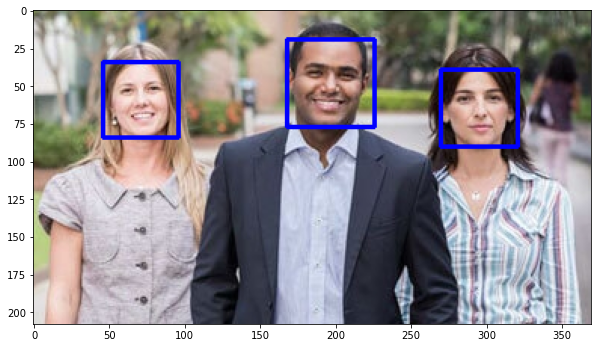

In [12]:
# Given the image above, lets detect faces on the image using haar cascades
# First create a CascadeClassifier using the frontalFace classifier -> Haarcascades/haarcascade_frontalface_default.xml

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Using the classifiers detect all faces on the image
face_cords = face_classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

# If no faces detected print("No faces found")
if face_cords is ():
    print("No faces found")

# Otherwise draw a rectangle on each face that has been detected
for x, y, w, h in face_cords:
    #draw rectangle
    cv2.rectangle(image, (x,y), (x+w, y+h), (255, 0,0), thickness=2)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-15-a11194638c59>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if face_cords is ():


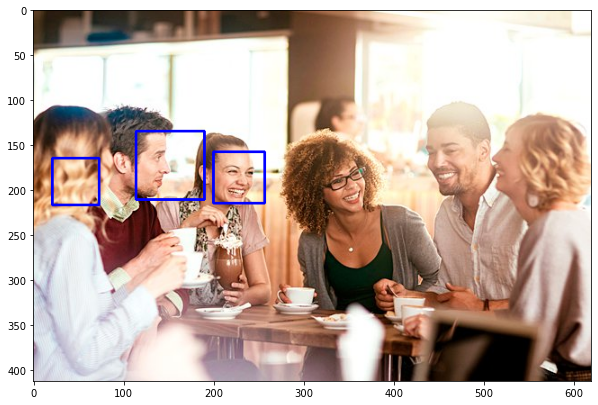

In [15]:
image = cv2.imread('img/people-laughing-talking.jpg')
# Repeat the process above with your own images
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Using the classifiers detect all faces on the image
face_cords = face_classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=2)

# If no faces detected print("No faces found")
if face_cords is ():
    print("No faces found")

# Otherwise draw a rectangle on each face that has been detected
for x, y, w, h in face_cords:
    #draw rectangle
    cv2.rectangle(image, (x,y), (x+w, y+h), (255, 0,0), thickness=2)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

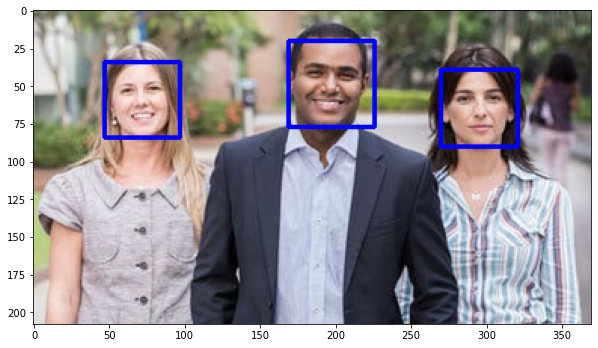

In [7]:
# Now do the same but this time also detect eyes in the faces using -> Haarcascades/haarcascade_eye.xml
img = cv2.imread('img/people2.jpg')
gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [2]:
# Encapsulate all the logic to detect faces and eyes in a function and apply it to live video using you webcam
# now we have the haarcascades files 
# to detect the face and eyes to detect the face
faces=cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
# to detect the eyes
eyes=cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

# capture the frame through webcam
capture=cv2.VideoCapture(0)

# now running the loop for the webcam
while True:
    # reading the webcam
    ret,frame=capture.read()

    # now the face is in the frame
    # the detection is done with the gray scale frame
    gray_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    face=faces.detectMultiScale(gray_frame,1.3,5)

    # now getting into the face and its position
    for (x,y,w,h) in face:
        # drawing the rectangle on the face
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),thickness=4)

        # now the eyes are on the face
        # so we have to make the face frame gray
        gray_face=gray_frame[y:y+h,x:x+w]

        # make the color face also
        color_face=frame[y:y+h,x:x+w]

        # check the eyes on this face
        eye=eyes.detectMultiScale(gray_face,1.3,5)

        # get into the eyes with its position
        for (a,b,c,d) in eye:
            # we have to draw the rectangle on the
            # coloured face
            cv2.rectangle(color_face,(a,b),(a+c,b+d),(0,255,0),thickness=4)

    # show the frame
    cv2.imshow("Abhinav's Frame",frame)
    if cv2.waitKey(1)==13:
        break

# after ending the loop release the frame
capture.release()
cv2.destroyAllWindows()